# HACK YEAH COVID19

# CO-LINK TEAM

# 1. The Lists of Data Table
### 1) Case Data
- **Case**: Data of COVID-19 infection cases in South Korea

### 2) Patient Data
- **PatientInfo**: Epidemiological data of COVID-19 patients in South Korea
- **PatientRoute**: Route data of COVID-19 patients in South Korea

### 3) Time Series Data
- **Time**: Time series data of COVID-19 status in South Korea
- **TimeAge**: Time series data of COVID-19 status in terms of the age in South Korea
- **TimeGender**: Time series data of COVID-19 status in terms of gender in South Korea
- **TimeProvince**: Time series data of COVID-19 status in terms of the Province in South Korea

### 4) Additional Data
- **Region**: Location and statistical data of the regions in South Korea
- **Weather**: Data of the weather in the regions of South Korea
- **SearchTrend**: Trend data of the keywords searched in NAVER which is one of the largest portals in South Korea
- **SeoulFloating**: Data of floating population in Seoul, South Korea (from SK Telecom Big Data Hub)

# 2. The Structure of our Dataset
- What color means is that they have similar properties.
- If a line is connected between columns, it means that the values of the columns are partially shared.
- The dotted lines mean weak relevance.
![db](https://user-images.githubusercontent.com/50820635/78222744-b0824a80-7500-11ea-84d8-49775e562108.PNG)

# 3. The Detailed Description of each Data Table

In [563]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # importing matplotlib 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/coronavirusdataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [564]:
path = 'coronavirusdataset/'

case = p_info = pd.read_csv(path+'Case.csv')
p_info = pd.read_csv(path+'PatientInfo.csv')
p_route = pd.read_csv(path+'PatientRoute.csv')
time = pd.read_csv(path+'Time.csv')
t_age = pd.read_csv(path+'TimeAge.csv')
t_gender = pd.read_csv(path+'TimeGender.csv')
t_provin = pd.read_csv(path+'TimeProvince.csv')
region = pd.read_csv(path+'Region.csv')
weather = pd.read_csv(path+'Weather.csv')
search = pd.read_csv(path+'SearchTrend.csv')
floating = pd.read_csv(path+'SeoulFloating.csv')

### 1) Case
#### Data of COVID-19 infection cases in South Korea
1. case_id: the ID of the infection case
  > - case_id(7) = region_code(5) + case_number(2)  
  > - You can check the region_code in 'Region.csv'
- province: Special City / Metropolitan City / Province(-do)
- city: City(-si) / Country (-gun) / District (-gu)
  > - The value 'from other city' means that where the group infection started is other city.
- group: TRUE: group infection / FALSE: not group
  > - If the value is 'TRUE' in this column, the value of 'infection_cases' means the name of group.  
  > - The values named 'contact with patient', 'overseas inflow' and 'etc' are not group infection. 
- infection_case: the infection case (the name of group or other cases)
  > - The value 'overseas inflow' means that the infection is from other country.  
  > - Tha value 'etc' includes individual cases, cases where relevance classification is ongoing after investigation, and cases under investigation.
- confirmed: the accumulated number of the confirmed
- latitude: the latitude of the group (WGS84)
- longitude: the longitude of the group (WGS84)


In [565]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,96,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,20,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


### 2) PatientInfo
#### Epidemiological data of COVID-19 patients in South Korea
1. patient_id: the ID of the patient
  > - patient_id(10) = region_code(5) + patient_number(5)
  > - You can check the region_code in 'Region.csv'
  > - There are two types of the patient_number  
      1) local_num: The number given by the local government.  
      2) global_num: The number given by the KCDC  
- global_num: the number given by KCDC
  > - There are some patients having no global_num.
  > - The paitents in Busan doesn't have the global_num.
- sex: the sex of the patient
- birth_year: the birth year of the patient
- age: the age of the patient
  > - 0s: 0 ~ 9  
  > - 10s: 10 ~ 19  
  ...  
  > - 90s: 90 ~ 99  
  > - 100s: 100 ~ 109
- country: the country of the patient
- province: the province of the patient
- city: the city of the patient
- disease: TRUE: underlying disease / FALSE: no disease
- infection_case: the case of infection
- infection_order: the order of infection
- infected_by: the ID of who infected the patient
  > - This column refers to the  'patient_id' column. 
- contact_number: the number of contacts with people
- symptom_onset_date: the date of symptom onset
- confirmed_date: the date of being confirmed
- released_date: the date of being released
- deceased_date: the date of being deceased
- state: isolated / released / deceased
  > - isolated: being isolated in the hospital
  > - released: being released from the hospital
  > - deceased: being deceased

In [566]:
p_info.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


### 3) PatientRoute
#### Route data of COVID-19 patients in South Korea
- patient_id: the ID of the patient
- global_num: the number given by KCDC
- date: YYYY-MM-DD
- province: Special City / Metropolitan City / Province(-do)
- city: City(-si) / Country (-gun) / District (-gu)
- latitude: the latitude of the visit (WGS84)
- longitude: the longitude of the visit (WGS84)

In [567]:
p_route.head()

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000002,5.0,2020-01-26,Seoul,Gwangjin-gu,store,37.563992,127.029534
1,1000000002,5.0,2020-01-27,Seoul,Gangbuk-gu,store,37.592057,127.018898
2,1000000002,5.0,2020-01-28,Seoul,Gangbuk-gu,store,37.591669,127.018420
3,1000000002,5.0,2020-01-29,Seoul,Seongbuk-gu,hospital,37.606498,127.092761
4,1000000002,5.0,2020-01-30,Seoul,Seongbuk-gu,hospital,37.612772,127.098167


### 4) Time
#### Time series data of COVID-19 status in South Korea
- date: YYYY-MM-DD
- time: Time (0 = AM 12:00 / 16 = PM 04:00)
  > - The time for KCDC to open the information has been changed from PM 04:00 to AM 12:00 since March 2nd.
- test: the accumulated number of tests
  > - A test is a diagnosis of an infection.
- negative: the accumulated number of negative results
- confirmed: the accumulated number of positive results
- released: the accumulated number of releases
- deceased: the accumulated number of deceases

In [568]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


### 5) TimeAge
#### Time series data of COVID-19 status in terms of the age in South Korea
- date: YYYY-MM-DD
  > - The status in terms of the age has been presented since March 2nd.
- time: Time
- age: the age of patients
- confirmed: the accumulated number of the confirmed
- deceased: the accumulated number of the deceased

In [569]:
t_age.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


### 6) TimeGender
#### Time series data of COVID-19 status in terms of the gender in South Korea
- date: YYYY-MM-DD
  > - The status in terms of the gender has been presented since March 2nd.
- time: Time
- sex: the gender of patients
- confirmed: the accumulated number of the confirmed
- deceased: the accumulated number of the deceased

In [570]:
t_gender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


### 7) TimeProvince
#### Time series data of COVID-19 status in terms of the Province in South Korea
- date: YYYY-MM-DD
- time: Time
- province: the province of South Korea
- confirmed: the accumulated number of the confirmed in the province
  > - The confirmed status in terms of the provinces has been presented since Feburary 21th.
  > - The value before Feburary 21th can be different.
- released: the accumulated number of the released in the province
  > - The confirmed status in terms of the provinces has been presented since March 5th.
  > - The value before March 5th can be different.
- deceased: the accumulated number of the deceased in the province
  > - The confirmed status in terms of the provinces has been presented since March 5th.
  > - The value before March 5th can be different.

In [571]:
t_provin.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


### 8) Region
#### Location and statistical data of the regions in South Korea
- code: the code of the region
- province: Special City / Metropolitan City / Province(-do)
- city: City(-si) / Country (-gun) / District (-gu)
- latitude: the latitude of the visit (WGS84)
- longitude: the longitude of the visit (WGS84)
- elementary_school_count: the number of elementary schools
- kindergarten_count: the number of kindergartens
- university_count: the number of universities
- academy_ratio: the ratio of academies
- elderly_population_ratio: the ratio of the elderly population
- elderly_alone_ratio: the ratio of elderly households living alone
- nursing_home_count: the number of nursing homes

Source of the statistic: [KOSTAT (Statistics Korea)](http://kosis.kr/)

In [572]:
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


### 9) Weather
#### Data of the weather in the regions of South Korea
- code: the code of the region
- province: Special City / Metropolitan City / Province(-do)
- date: YYYY-MM-DD
- avg_temp: the average temperature
- min_temp: the lowest temperature
- max_temp: the highest temperature
- precipitation: the daily precipitation
- max_wind_speed: the maximum wind speed
- most_wind_direction: the most frequent wind direction
- avg_relative_humidity: the average relative humidity

Source of the weather data: [KMA (Korea Meteorological Administration)](http://data.kma.go.kr)

In [573]:
weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,NaN,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,NaN,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,NaN,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,NaN,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,NaN,5.3,180.0,83.9


### 10) SearchTrend
#### Trend data of the keywords searched in NAVER which is one of the largest portal in South Korea
- date: YYYY-MM-DD
- cold: the search volume of 'cold' in Korean language
  > - The unit means relative value by setting the highest search volume in the period to 100.
- flu: the search volume of 'flu' in Korean language
  > - Same as above.
- pneumonia: the search volume of 'pneumonia' in Korean language
  > - Same as above.
- coronavirus: the search volume of 'coronavirus' in Korean language
  > - Same as above.


Source of the data: [NAVER DataLab](https://datalab.naver.com/)

In [574]:
search.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


### 11) SeoulFloating
#### Data of floating population in Seoul, South Korea (from SK Telecom Big Data Hub)

- date: YYYY-MM-DD
- hour: Hour
- birth_year: the birth year of the floating population
- sext: he sex of the floating population
- province: Special City / Metropolitan City / Province(-do)
- city: City(-si) / Country (-gun) / District (-gu)
- fp_num: the number of floating population

Source of the data: [SKT Big Data Hub](https://www.bigdatahub.co.kr)

In [575]:
floating.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


# 4. Analysis

### 1) Affected people

In [576]:
p_info[:10]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
5,1000000006,10.0,female,1966.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,43.0,NaN,2020-01-31,2020-02-19,NaN,released
6,1000000007,11.0,male,1995.0,20s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,0.0,NaN,2020-01-31,2020-02-10,NaN,released
7,1000000008,13.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0.0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,19.0,male,1983.0,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68.0,NaN,2020-02-05,2020-02-21,NaN,released
9,1000000010,21.0,female,1960.0,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,3.0,1.000000e+09,6.0,NaN,2020-02-05,2020-02-29,NaN,released


In [577]:
p_age_state=p_info[['age','state']]

In [578]:
p_age_state=p_age_state.groupby(['age','state']).size().to_frame('count').reset_index()

In [579]:
p_age_state[:10]

,age,state,count
0,0s,isolated,22
1,0s,released,16
2,100s,isolated,1
3,10s,isolated,73
4,10s,released,42
5,20s,isolated,397
6,20s,released,254
7,30s,deceased,1
8,30s,isolated,229
9,30s,released,121


In [580]:
p_age_state['percent'] = p_age_state.groupby(['age'])['count'].transform(lambda x: (x*100)/x.sum())

In [581]:
p_age_state['percent'] = p_age_state.percent.astype(int)

In [582]:
p_age_state[p_age_state['age']!='100s']

,age,state,count,percent
0,0s,isolated,22,57
1,0s,released,16,42
3,10s,isolated,73,63
4,10s,released,42,36
5,20s,isolated,397,60
6,20s,released,254,39
7,30s,deceased,1,0
8,30s,isolated,229,65
9,30s,released,121,34
10,40s,deceased,1,0


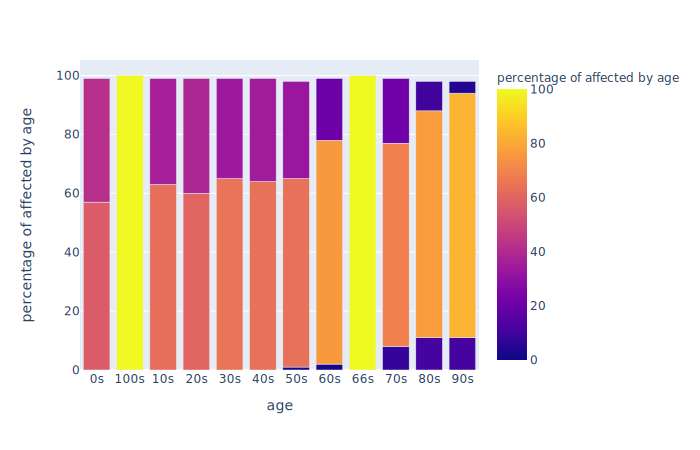

In [583]:
import plotly.express as px

f = px.bar(p_age_state, x ='age', y='percent')
fig = px.bar(p_age_state, x='age', y='percent',
             hover_data=['state', 'count'], color='percent',
             labels={'percent':'percentage of affected by age'}, height=400)
fig.show(renderer="svg")

### 2) Percent of death people

In [584]:
p_age_state=p_age_state[p_age_state.state=='deceased']

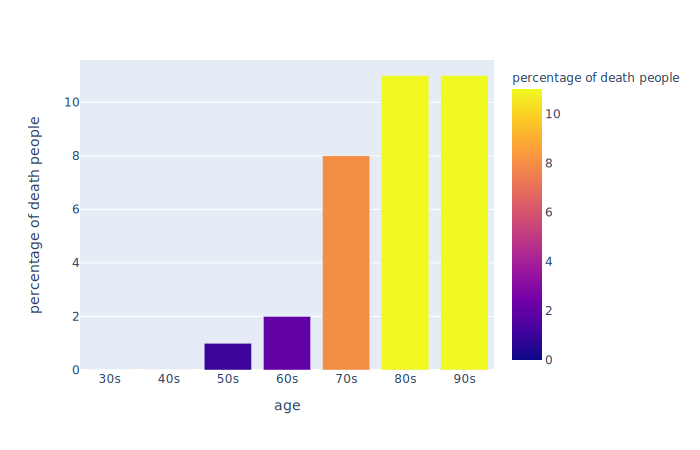

In [585]:
fig = px.bar(p_age_state, x ='age', y='percent', color='percent',
             labels={'percent':'percentage of death people'}, height=400)
fig.show(renderer="svg")

In [586]:
age_transpose = pd.get_dummies(p_age_state['age'])
state_transpose = pd.get_dummies(p_age_state['state'])

In [587]:
p_age_state_tr = pd.concat([p_age_state,age_transpose,state_transpose],axis=1)

In [588]:
p_age_state_tr = p_age_state_tr.drop(columns=['age','state','percent'])

### 3) Kmeans

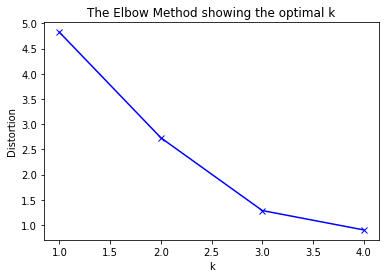

In [589]:
# Prepare Kmeans
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


distortions = []
K = range(1,5)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(p_age_state_tr)
    kmeanModel.fit(p_age_state_tr)
    distortions.append(sum(np.min(cdist(p_age_state_tr, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / p_age_state_tr.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

[[ 1.          0.5         0.5         0.          0.          0.
   0.          0.          1.        ]
 [15.          0.          0.          0.          0.          0.5
   0.5         0.          1.        ]
 [ 7.          0.          0.          0.33333333  0.33333333  0.
   0.          0.33333333  1.        ]]


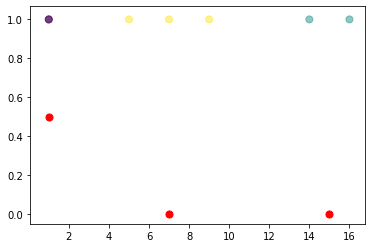

In [590]:
kmeans = KMeans(n_clusters=3).fit(p_age_state_tr)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(p_age_state_tr['count'], p_age_state_tr['deceased'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [591]:
#K means Clustering 
def doKmeans(X, nclust=5):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [592]:
clust_labels, cent = doKmeans(p_age_state_tr, 3)
kmeans = pd.DataFrame(clust_labels)

In [593]:
p_age_state_tr=p_age_state_tr.reset_index()

In [594]:
p_age_state_tr['kmeans']=kmeans

In [595]:
p_age_state_tr['age']=['30s','40s','50s','60s','70s','80s','90s']

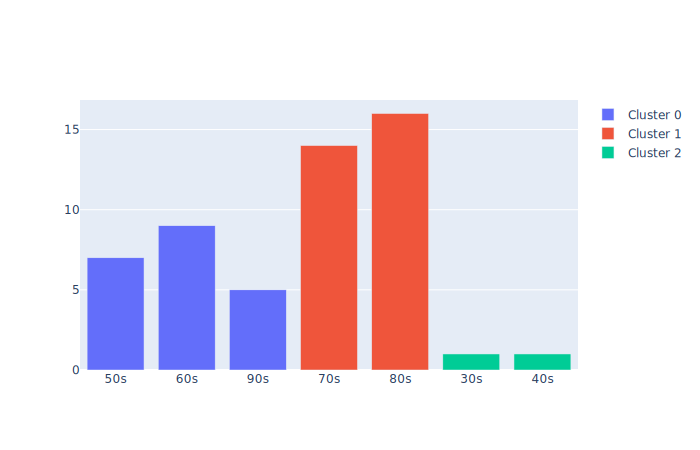

In [596]:
# import plotly.express as px
data0 = p_age_state_tr[p_age_state_tr.kmeans == 0]
data1 = p_age_state_tr[p_age_state_tr.kmeans == 1]
data2 = p_age_state_tr[p_age_state_tr.kmeans == 2]

# fig = px.bar(data, x='age', y='count')
# fig.show()


from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

fig = make_subplots(rows=1, cols=1, shared_yaxes=True)

fig.add_trace(go.Bar(x=data0["age"],y=data0["count"],name='Cluster 0'))
fig.add_trace(go.Bar(x=data1["age"],y=data1["count"],name='Cluster 1',))
fig.add_trace(go.Bar(x=data2["age"],y=data2["count"],name='Cluster 2',))
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=True, height=400)
fig.show(renderer="svg")